In [126]:
import pandas as pd

df = pd.read_csv("Turkish_Music_Mood_Recognition.csv")


df.columns
df.head()


,Class,_Fluctuation_Mean,_MFCC_Mean_2,_MFCC_Mean_4,_MFCC_Mean_7,_Roughness_Mean,_Roughness_Slope,_Zero-crossingrate_Mean,_AttackTime_Mean,_Eventdensity_Mean,_Pulseclarity_Mean,_Chromagram_Mean_7,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_PeriodAmp
0,relax,9.136,0.363,0.078,-0.151,51.542,0.325,403.129,0.028,1.336,0.082,0.024,0.316,0.593
1,relax,6.680,0.516,0.397,-0.403,336.839,0.366,204.886,0.015,1.336,0.051,0.120,0.285,0.702
2,relax,10.578,0.903,0.329,-0.246,39.864,0.224,685.474,0.033,1.336,0.299,0.563,0.413,0.692
3,relax,10.442,1.552,0.351,0.047,353.744,0.215,579.859,0.029,2.105,0.121,0.276,0.422,0.743
4,relax,9.769,0.228,0.096,0.104,46.884,-0.118,430.536,0.040,1.370,0.208,0.135,0.345,0.674


In [127]:
df['Class'].head()
df['Class'].unique()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['mood_encoded'] = le.fit_transform(df['Class'])
df[['Class', 'mood_encoded']].head(5)



,Class,mood_encoded
0,relax,2
1,relax,2
2,relax,2
3,relax,2
4,relax,2


In [128]:
import joblib
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

# Seperating Features x and y 

In [129]:
x = df.drop(['Class', 'mood_encoded'], axis=1)
y = df['mood_encoded']
print("X shape:", x.shape)
print("y shape:", y.shape)


X shape: (400, 13)
y shape: (400,)


# Splitting the data into Training and test(5% testing 95% training)


In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



x_train shape: (320, 13)
x_test shape: (80, 13)
y_train shape: (320,)
y_test shape: (80,)


In [131]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

# Evaluating The Random Forest Model

In [132]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

print(" Random Forest Results ")
rf_pred = rf_model.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(classification_report(y_test, rf_pred))



best_model = rf_model  
import joblib
joblib.dump(best_model, "mood_model.pkl")
print("Best model saved as mood_model.pkl")

 Random Forest Results 
Accuracy: 0.8750
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.86      1.00      0.92        18
           2       0.89      0.96      0.93        26
           3       0.85      0.61      0.71        18

    accuracy                           0.88        80
   macro avg       0.87      0.87      0.86        80
weighted avg       0.87      0.88      0.87        80

Best model saved as mood_model.pkl


In [133]:

import joblib
joblib.dump(rf_model, "mood_model.pkl")
joblib.dump(le, "label_encoder.pkl")
import os
os.listdir()


['.git',
 'app.py',
 'label_encoder.pkl',
 'mlexperiments.ipynb',
 'mood_model.pkl',
 'README.md',
 'tt',
 'Turkish_Music_Mood_Recognition.csv',
 '__pycache__']

Model Accuracy: 87.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.85      0.94      0.89        18
           2       0.93      0.96      0.94        26
           3       0.85      0.61      0.71        18

    accuracy                           0.88        80
   macro avg       0.87      0.87      0.86        80
weighted avg       0.87      0.88      0.87        80



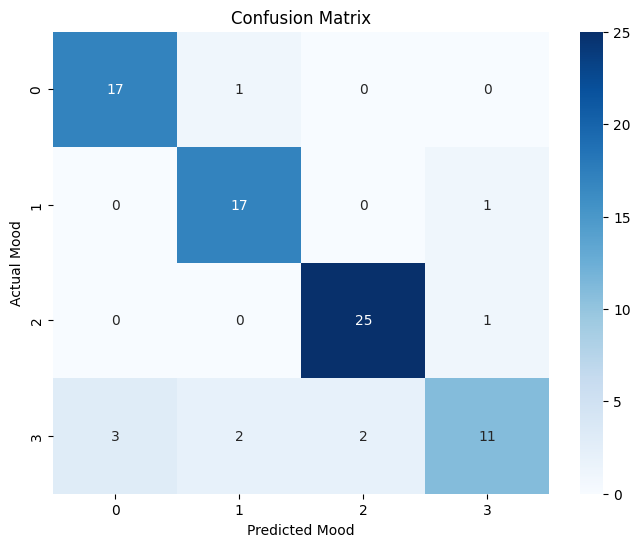

In [134]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Mood')
plt.ylabel('Actual Mood')
plt.show()